# Experiment 1.3: Text Modality Analysis

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import numpy as np

from pathlib import Path

FIGURE_DIR = Path('./figures')
Path.mkdir(FIGURE_DIR, exist_ok=True)

plt.rcParams.update({
    "font.size": 27,
    "axes.titlesize": 27,
    "axes.labelsize": 27,
})

plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.titleweight'] = 'bold'

## Load and Process Results

In [2]:
results_dir = Path('./results')
all_results = []
for result_file in results_dir.glob('*.json'):
    with open(result_file, 'r') as f:
        try:
            data = json.load(f)
            all_results.append(data)
        except json.JSONDecodeError:
            print(f'Warning: Could not decode JSON from {result_file}')

df = pd.json_normalize(all_results)

## Overall Performance Comparison

--- Analyzing Benchmark: text_ag_news ---


/tmp/ipykernel_1223829/1861662728.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


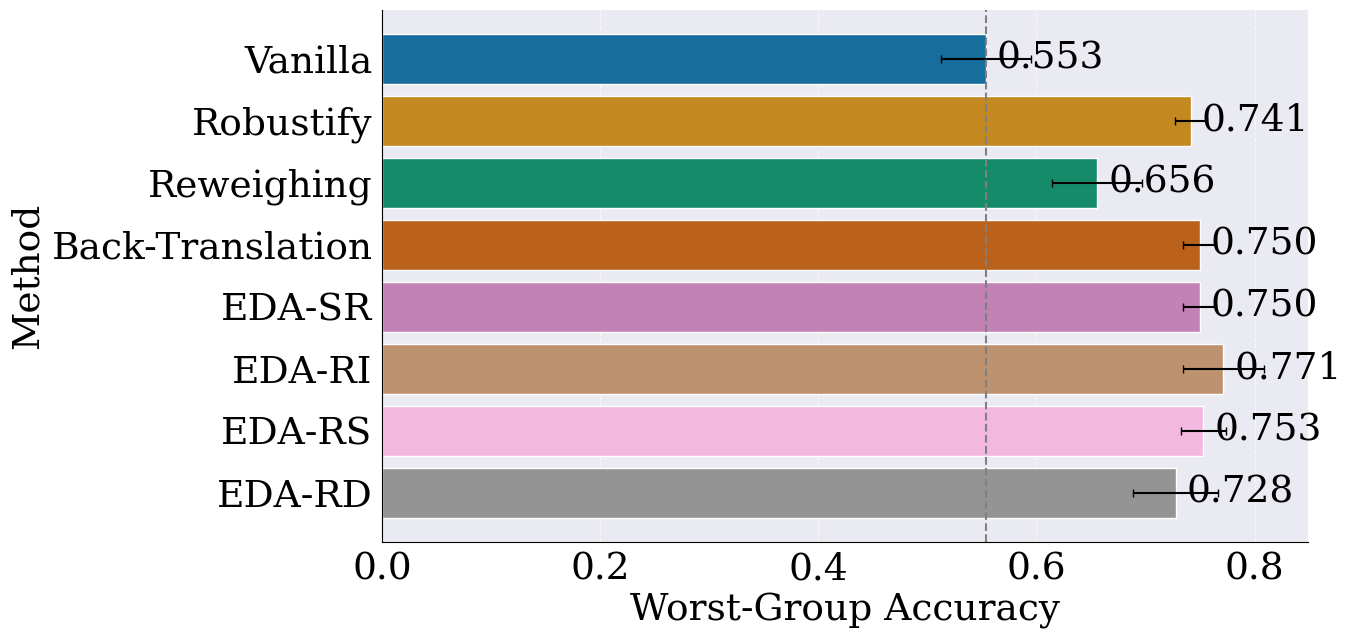

--- Analyzing Benchmark: text_bias_in_bios ---


/tmp/ipykernel_1223829/1861662728.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


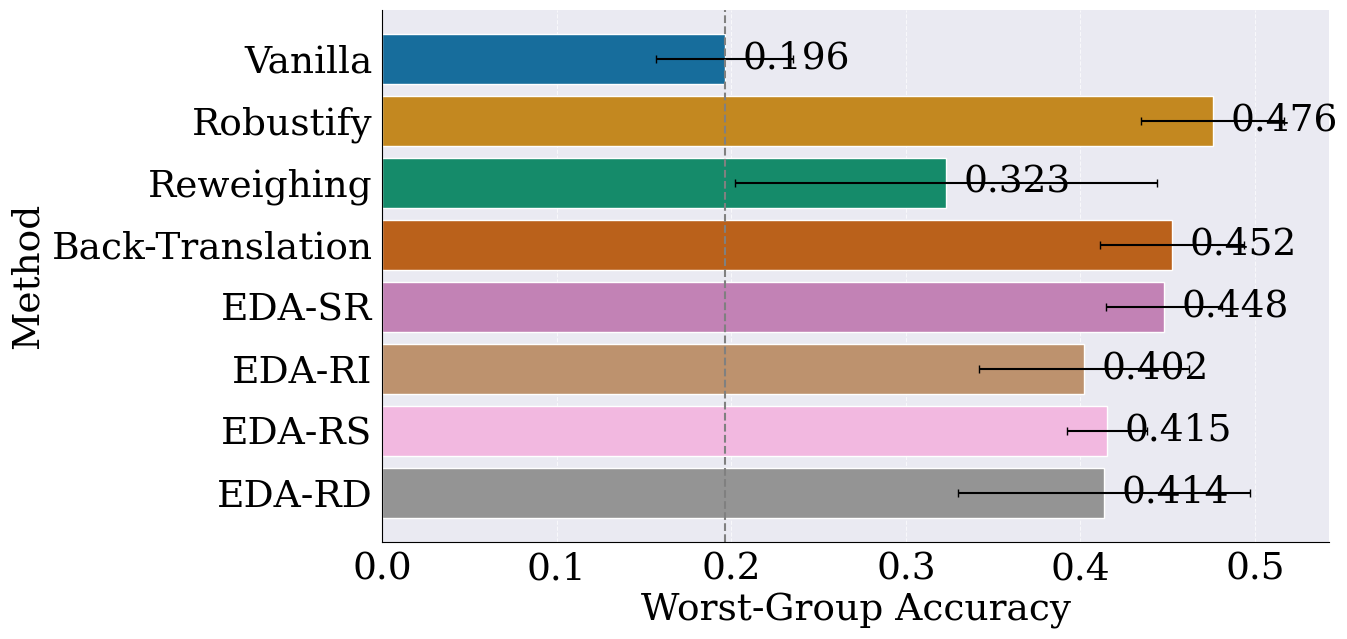

In [ ]:
for benchmark_name in df['benchmark_name'].unique():
    print(f'--- Analyzing Benchmark: {benchmark_name} ---')
    benchmark_df = df[df['benchmark_name'] == benchmark_name].copy()

    methods = {
        'Vanilla': ('initial_worst', 'initial_overall'),
        'Robustify': ('our_method_worst', 'our_method_overall'),
        'Reweighing': ('reweigh_worst', 'reweigh_overall'),
        'Back-Translation': ('backtranslation_worst', 'backtranslation_overall'),
        'EDA-SR': ('eda_results.sr.worst', 'eda_results.sr.overall'),
        'EDA-RI': ('eda_results.ri.worst', 'eda_results.ri.overall'),
        'EDA-RS': ('eda_results.rs.worst', 'eda_results.rs.overall'),
        'EDA-RD': ('eda_results.rd.worst', 'eda_results.rd.overall')
    }

    summary_data = []
    for method, (worst_key, overall_key) in methods.items():
        if worst_key in benchmark_df.columns and overall_key in benchmark_df.columns:
            summary_data.append({
                'Method': method,
                'Avg. Worst Group Accuracy': benchmark_df[worst_key].mean(),
                'Std. Worst Group Accuracy': benchmark_df[worst_key].std()
            })

    summary_df = pd.DataFrame(summary_data)


    plt.figure(figsize=(14, 7))
    ax = sns.barplot(
        x='Avg. Worst Group Accuracy',
        y='Method',
        data=summary_df,
        palette='colorblind'
    )

    # --- Manually add error bars --- 
    ax.errorbar(
        x=summary_df['Avg. Worst Group Accuracy'], 
        y=np.arange(len(summary_df)), 
        xerr=summary_df['Std. Worst Group Accuracy'], 
        fmt='none', 
        c='black', 
        capsize=3
    )

    # ax.set_title(f'Worst-Group Accuracy ({benchmark_name})', fontweight='bold')
    ax.set_xlabel('Worst-Group Accuracy')
    ax.set_ylabel('Method')

    initial_acc = summary_df[summary_df['Method'] == 'Vanilla']['Avg. Worst Group Accuracy'].values[0]
    plt.axvline(x=initial_acc, color='grey', linestyle='--', label=f'Vanilla ({initial_acc:.3f})')

    sns.despine()
    ax.grid(axis='x', linestyle='--', alpha=0.7)
    ax.set_axisbelow(True)

    for p in ax.patches:
        width = p.get_width()
        plt.text(width + 0.01, p.get_y() + p.get_height()/2.,
                 f'{width:.3f}',
                 ha='left', va='center')

    # plt.legend()
    plt.tight_layout()
    plt.savefig(FIGURE_DIR / f"{benchmark_name}.png", dpi=300, bbox_inches="tight")
    plt.show()
